In [2]:

from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pdb

class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, lr=0.001, n_iter=10, verbose = False):
        self.verbose = verbose
        self.W1 = None
        self.b1 = None
        self.W2 = None
        self.b2 = None
        self.W3 = None
        self.b3 = None
        self.a1 = None
        self.z1 = None
        self.a2 = None
        self.z2 = None
        self.a3 = None
        self.output = None
        self.loss = None
        self.y_one_hot = None
        self.y_val_one_hot = None
        self.batch_size = 100
        self.lr = lr
        self.cost_list = []
        self.cost_list_val = []
        self.iter = n_iter
        
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """        
        n_batch = X.shape[0] // self.batch_size
        self.init_weight()
        for ite in range(self.iter):
            batch_cnt=0
            for i in range(n_batch):
                x_batch = X[i*self.batch_size: (i+1)*self.batch_size, :] 
                y_batch = y[i*self.batch_size: (i+1)*self.batch_size, :]
                self.forward(x_batch)
                cost = (1/self.batch_size)*self.cost(y_batch)
                self.cost_list.append(cost)
                self.backward(x_batch, y_batch)
                batch_cnt += 1
        
                if self.verbose:
                    if batch_cnt % 10 ==0:
                        print("iter{}週目, batch {}/{}回目".format(ite+1, i+1, X.shape[0]//self.batch_size))
            
            if X_val is not None:
                self.forward(X_val)
                cost_val = (1/y_val.shape[0])*self.cost(y_val)
                self.cost_list_val.append(cost_val)
    
    

    def forward(self, X):
        self.a1 = np.dot(X, self.W1) + self.b1
        self.z1 = self.tanh(self.a1)
        self.a2 = np.dot(self.z1, self.W2) + self.b2
        self.z2 = self.tanh(self.a2)
        self.a3 = np.dot(self.z2, self.W3) + self.b3
        self.output = self.softmax(self.a3)
        
        return self.output
        
    def backward(self, X, y):
        #３層目
        b_a3 = self.output - y
        b_b3 = np.sum(b_a3, axis=0)
        b_W3 = np.dot(self.z2.T, b_a3)
        b_z2 = np.dot(b_a3, self.W3.T) 
        self.b3 -= self.lr*b_b3
        self.W3 -= self.lr*b_W3
        
        #2層目
        b_a2 = b_z2*(1-np.power(self.tanh(self.a2), 2))
        b_b2 = np.sum(b_a2, axis=0)
        b_W2 = np.dot(self.z1.T, b_a2)
        b_z1 = np.dot(b_a2, self.W2.T) 
        self.b2 -= self.lr*b_b2
        self.W2 -= self.lr*b_W2
        
        #1層目
        b_a1 = b_z1*(1-np.power(self.tanh(self.a1),2))
        b_b1 = np.sum(b_a1, axis=0)
        b_W1 = np.dot(X.T, b_a1)
        self.b1 -= self.lr*b_b1
        self.W1 -= self.lr*b_W1
    
    
    def cost(self, y):
        return -np.sum(np.log(self.output)*y)
        
        
    
    def init_weight(self):
        n_features = 784
        n_nodes1 = 400
        n_nodes2 = 200
        n_output = 10
        sigma = 0.01 # ガウス分布の標準偏差
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.b1 = sigma * np.random.randn(n_nodes1, 1).T
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.b2 = sigma * np.random.randn(n_nodes2, 1).T
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        self.b3 = sigma * np.random.randn(n_output, 1).T

    def tanh(self, X):
        return  (np.exp(X)-np.exp(-X)) / (np.exp(X)+np.exp(-X))
    
    def softmax(self, X):
        return np.exp(X) / np.sum(np.exp(X), axis=1).reshape(-1, 1)
       
    

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pred = self.forward(X)
        pred_num = np.argmax(pred, axis=1)        
        return pred_num

# 【問題1】〜【問題５】

# 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [5]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) 

1.0
0.0


In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [8]:
nnc = ScratchSimpleNeuralNetrowkClassifier()

In [9]:
nnc.fit(X_train, y_train, X_val, y_val)

In [10]:
pred_test = nnc.predict(X_test)

In [11]:
print("test_Accuracy:{:.3f}".format(np.sum(pred_test==y_test) / len(pred_test)))

test_Accuracy:0.959


# 【問題7】学習曲線のプロット
学習曲線をプロットしてください。



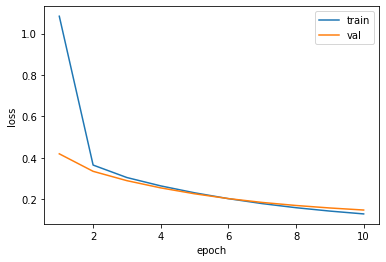

In [13]:
import matplotlib.pyplot as plt
cost_by_epoch = []
for i in range(int(len(nnc.cost_list)/480)):
    cost_by_epoch.append(np.average(nnc.cost_list[i*480:(i+1)*480]))

plt.plot([i+1 for i in range(len(cost_by_epoch))], cost_by_epoch, label="train")
plt.plot([i+1 for i in range(len(nnc.cost_list_val))], nnc.cost_list_val, label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()